<a href="https://colab.research.google.com/github/farhadkamangar/CSE5368/blob/master/tensorflow_muti_layer_training_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import tensorflow_datasets as tfd
print(tf.__version__)

2.9.2


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.datasets import mnist


(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)
# train_data, val_data, test_data = tfd.load("mnist", 
#                                             split=['train[10000:]', 'train[0:10000]', 'test'],
#                                             batch_size=128, as_supervised=True)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


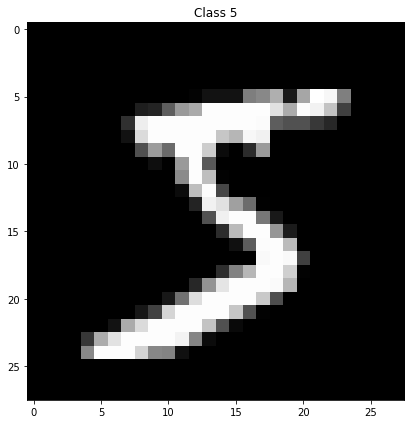

0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    3   18   18   18  126  136  175   26  166  255  247  127  0  0  0  0  
0  0  0  0    0    0    0    0   30   36   94  154  170  253  253  253  253  253  225  172  253  242  195   64  0  0  0  0  
0  0  0  0    0    0    0   49  238  253  253  253  253  253  253  253  253  251   93   82   82   56   39    0  0  0  0  0  


In [8]:
# Let's look at the first sample (image)
plt.rcParams['figure.figsize'] = (6,6)
plt.subplot(1,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Class {}".format(y_train[0]))
plt.tight_layout()
plt.show()
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
        
matprint(X_train[0])

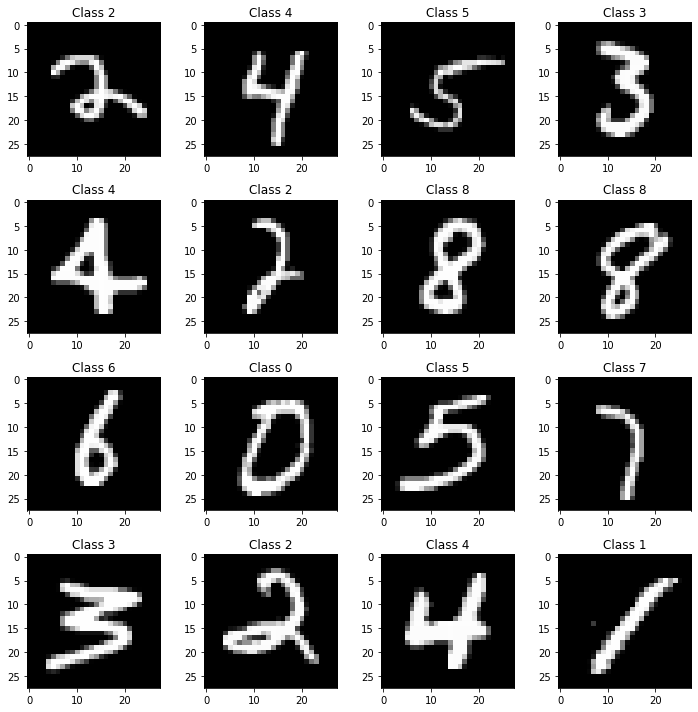

In [9]:
# Let's look at some random samples (images)
plt.rcParams['figure.figsize'] = (10,10)

for i in range(16):
    plt.subplot(4,4,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [10]:
# Prepare data for processing.
# Reshape
# Normalize

X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

X_train_reshaped = X_train_reshaped.astype('float32')  
X_test_reshaped = X_test_reshaped.astype('float32')

X_train_reshaped=X_train_reshaped /255           
X_test_reshaped=X_test_reshaped / 255

print( X_train_reshaped.shape)
print(X_test_reshaped.shape)

(60000, 784)
(10000, 784)


In [21]:
class FlexibleDenseLayer(tf.Module):
  def __init__(self, number_of_nodes=2, activation=tf.identity):
   
    self.weights_are_initialized=False
    self.number_of_nodes=number_of_nodes
    self.activation=activation
  @tf.function  
  def calculate_output(self, x):
    if not self.weights_are_initialized:
      self.w = tf.Variable(tf.random.normal([x.shape[-1], self.number_of_nodes]), name='weights')
      self.b = tf.Variable(tf.zeros([self.number_of_nodes]), name='biases')
      self.weights_are_initialized=True
    a = tf.add(tf.matmul(x, self.w) , self.b)
    return self.activation(a)

In [22]:
class MultiLayer_NN(tf.Module):
  def __init__(self,layers):
    
    self.layers=layers

  @tf.function
  def predict(self, x):
    temp=x
    for current_layer in self.layers:
      temp=current_layer.calculate_output(temp)
    
    return temp


In [23]:
layer_1_size = 20
layer_2_size = 30
output_layer_size = 10

my_model = MultiLayer_NN([
    FlexibleDenseLayer(number_of_nodes=layer_1_size, activation=tf.nn.relu),
    FlexibleDenseLayer(number_of_nodes=layer_2_size, activation=tf.nn.relu),
    FlexibleDenseLayer(number_of_nodes=output_layer_size)])

In [26]:
output_of_model=my_model.predict(tf.constant([[1.0, 2.0, 3.0]]))
print(output_of_model)

tf.Tensor(
[[-12.045758  14.3948   -82.03752   15.218633  22.274984 -25.64686
   11.747948  21.237434 -74.76466   -4.767046]], shape=(1, 10), dtype=float32)
